# Lab 6: Convolutional Network Architectures
## by Michael Doherty, Leilani Guzman, and Carson Pittman

Link to the dataset: https://www.kaggle.com/datasets/brsdincer/vehicle-detection-image-set

## 1. Preparation
### 1.1 Performance Metric

In [1]:
import glob
import warnings
from tensorflow.keras.preprocessing.image import load_img, img_to_array

warnings.simplefilter('ignore')

# load in images and labels as numpy arrays
images_and_labels = []

for filename in glob.glob('data/vehicles/*.png'):
    img = load_img(filename)
    img_array = img_to_array(img)
    
    images_and_labels.append(tuple((img_array, 'vehicle')))
    

for filename in glob.glob('data/non-vehicles/*.png'):
    img = load_img(filename)
    img_array = img_to_array(img)
    
    images_and_labels.append(tuple((img_array, 'non_vehicle')))
    

print('There are', len(images_and_labels), 'images')

There are 17760 images


Now that we've read in the images, let's visualize the distribution of labels for our images.

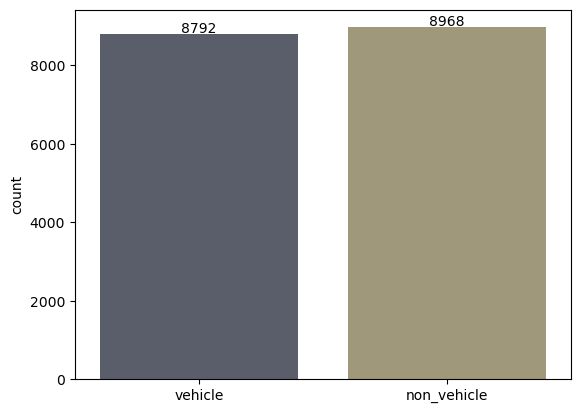

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x=[label for _, label in images_and_labels], palette='cividis')

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.0f}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                ha='center', va='center', xytext=(0, 4), textcoords='offset points')

plt.xticks([0,1], ['vehicle', 'non_vehicle'])
plt.show()

As we can see, there are about the same number of instances for each label (<code>non_vehicle</code> has a little less than 200 more instances than <code>vehicle</code>). **ADD MORE**

Good performance metric is likely f1 score, although dataset is relatively balanced so accuracy might be ok too???

### 1.2 Training and Testing Method

Might not need to stratify splits, both classes have close to the same number of images

(I'm just gonna train_test_split for now, will change this later)

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

X = [image for image, _ in images_and_labels]
y = [0 if label == 'vehicle' else 1 for _, label in images_and_labels]

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

# normalize pixel values and mean shift
X_train = X_train/255.0 - 0.5
X_test = X_test/255.0 - 0.5

## 2. Modeling
### 2.1 Data Augmentation
Now that we've defined our performance metric and created training and testing splits for cross validation, let's start creating our Convolutional Neural Networks! Let's start by creating a base for our models that includes some augmentation layers.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomBrightness

model_base = Sequential()

model_base.add(RandomFlip("horizontal"))
model_base.add(RandomRotation(0.2))
model_base.add(RandomZoom(0.2))
model_base.add(RandomBrightness(0.2))

Explain why these augmentation features are appropriate...

### 2.2 Model Creation
Now let's create a few different models using the base structure we just created.

In [5]:
from tensorflow.keras.models import clone_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

cnn_1 = clone_model(model_base)


# The following was copied from Dr. Larson's Notebook (12. More Advanced CNN Techniques)
NUM_CLASSES = 2
img_wh = 64

# let's start with an AlexNet style convolutional phase
cnn_1.add(Conv2D(filters=32,
                input_shape = (img_wh,img_wh,1),
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax

# no max pool before next conv layer!!
cnn_1.add(Conv2D(filters=64,
                kernel_size=(3,3), 
                padding='same', 
                activation='relu')) # more compact syntax
cnn_1.add(MaxPooling2D(pool_size=(2, 2)))
    

# add one layer on flattened output
cnn_1.add(Dropout(0.25)) # add some dropout for regularization after conv layers
cnn_1.add(Flatten())
cnn_1.add(Dense(128, activation='relu'))
cnn_1.add(Dropout(0.5)) # add some dropout for regularization, again!
cnn_1.add(Dense(1, activation='sigmoid'))

# Let's train the model 
cnn_1.compile(loss='binary_crossentropy', # 'categorical_crossentropy' 'mean_squared_error'
              optimizer='rmsprop', # 'adadelta' 'rmsprop'
              metrics=['accuracy'])

history_1 = cnn_1.fit(X_train, y_train, batch_size=32, 
                   epochs=5, verbose=1,
                   validation_data=(X_test,y_test)
                  )

Epoch 1/5
444/444 [==============================] - 113s 245ms/step - loss: 0.9591 - accuracy: 0.4942 - val_loss: 1.0117 - val_accuracy: 0.5025
Epoch 2/5
444/444 [==============================] - 108s 243ms/step - loss: 0.7774 - accuracy: 0.5077 - val_loss: 1.0039 - val_accuracy: 0.5160
Epoch 3/5
444/444 [==============================] - 109s 245ms/step - loss: 0.7925 - accuracy: 0.5056 - val_loss: 0.9952 - val_accuracy: 0.5068
Epoch 4/5
444/444 [==============================] - 112s 253ms/step - loss: 0.8206 - accuracy: 0.5061 - val_loss: 2.1676 - val_accuracy: 0.5200
Epoch 5/5
444/444 [==============================] - 109s 245ms/step - loss: 0.8007 - accuracy: 0.5071 - val_loss: 2.4636 - val_accuracy: 0.5028


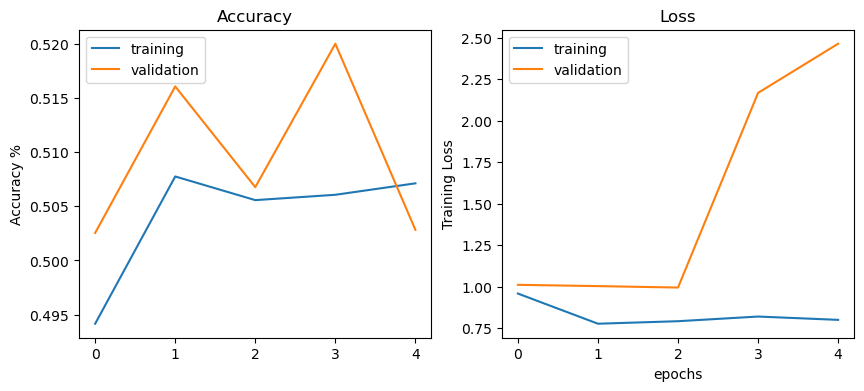

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_1.history['accuracy'], label='training')

plt.ylabel('Accuracy %')
plt.title('Training')
plt.plot(history_1.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_1.history['loss'], label='training')
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.plot(history_1.history['val_loss'], label='validation')
plt.xlabel('epochs')
plt.title('Loss')
plt.legend()
plt.show()

### 2.3 Model Visualization and Comparison

### 2.4 Convolutional Network vs. Multi-Layer Perceptron

## 3. Transfer Learning
### 3.1 Transfer Learning Model

### 3.2 Model Comparison